*Import Libraries*

In [103]:
import numpy as np
import tensorflow as tf                                                       # print(tf.__version__)
from tensorflow import keras
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt

**Function**

In [119]:
def plot_history(history_train, fig_size=(5,3)):
  _, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_size)
  
  axs[0].plot(history_train.history["loss"], label="train loss")
  axs[0].plot(history_train.history["val_loss"], label="validation loss")
  axs[0].set_xlabel("Epochs", fontsize=10)
  axs[0].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
  axs[0].grid(visible="on", which="major", axis="y", alpha=0.4, color="gray", linestyle="--")
  axs[0].set_yticks(np.round(axs[0].get_yticks(),2))
  
  axs[1].plot(history_train.history["accuracy"], label="train accuracy")
  axs[1].plot(history_train.history["val_accuracy"], label="validation accuracy")
  axs[1].set_xlabel("Epochs", fontsize=10)
  axs[1].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
  axs[1].grid(visible="on", which="major", axis="y", alpha=0.4, color="gray", linestyle="--")
  axs[1].set_yticks(np.round(axs[1].get_yticks(),2))
  
  plt.autoscale(enable=True, axis="both", tight=True)

*Step 1. Load data*<br/>
Path data: C:\Users\name pc\.keras<br/>
[MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist)<br>
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [105]:
name = 2                                                                        # 1:mnist; 2:fashion_mnist
if name==1:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()                    # 70,000 28x28
else:
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()            # 70,000 28x28
print(f"x_train.shape:{x_train.shape}")                                         # (60000, 28, 28) = (Number of images, 28 , 28)
print(f"x_test.shape:{x_test.shape}")                                           # (10000, 28, 28) = (Number of images, 28 , 28)
print(f"y_train.shape:{y_train.shape}")                                         # (60000,) = (Number of label)
print(f"y_test.shape:{y_test.shape}")                                           # (10000,) = (Number of label)
print(f"y_train[:10]:{y_train}")                                                # Train labels
print(f"x_train[0,]: {x_train[0, 0:2, :]}")                                     # (Image 0, 0:2 out of 28, 28) ==> Ankle boot
labels = np.unique(y_train)
print(f"labels: {labels}")

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
y_train.shape:(60000,)
y_test.shape:(10000,)
y_train[:10]:[9 0 0 ... 3 0 5]
x_train[0,]: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
labels: [0 1 2 3 4 5 6 7 8 9]


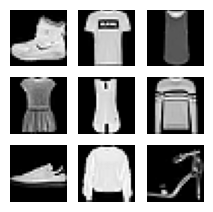

In [5]:
plt.figure(figsize=(2.5, 2.5))
for i in range(len(labels)-1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i, :, :], cmap='gray')
    plt.autoscale(axis="both", tight=True, enable=True)
    plt.axis("off")

*Step 2. Normalize data*<br/>
pixel values between 0 and 255; Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [106]:
x_train, x_test = x_train/255.0, x_test/255.0    

*Step 3. Creating a Sequential model*<br/>
[Sequential model](https://keras.io/guides/sequential_model/)<br/>
[Dense layer](https://keras.io/api/layers/core_layers/dense/)<br/>
[Activation functions](https://keras.io/api/layers/activations/)<br/>
[Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/)<br/>

In [108]:
# Define Sequential model with 3 layers using 2 methods
def building_model(x_train,units_layer1, units_layer2, units_output, fun_output, method):
    global model
    if method==1:
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape=x_train.shape[1:3]))         # Layer input : Input must be vectored; x_train.shape[1:3]:(28, 28)
        model.add(keras.layers.Dense(units_layer1, activation="relu"))          # Layer 1: The first hidden layer
        model.add(keras.layers.Dense(units_layer2, activation="relu"))          # Layer 2: The second hidden layer
        model.add(keras.layers.Dense(units_output, activation=fun_output))      # Layer output or 3: 10 neuron = 10 class; Multi classification then activation is softmax
    elif method==2:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
            keras.layers.Dense(units_layer1,activation="relu"),
            keras.layers.Dense(units_layer2, activation="relu"),
            keras.layers.Dense(units_output, activation=fun_output)])
    return model
model= building_model(x_train,units_layer1=100, units_layer2=75, units_output=10, fun_output="softmax", method=2)
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 100)               78500     
                                                                 
 dense_58 (Dense)            (None, 75)                7575      
                                                                 
 dense_59 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Step 3.1: Print the model parameters*

In [109]:
model.layers

In [110]:
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"weights:{weights}; weights.shape: {weights.shape}")
print(f" bias: {bias}; bias.shape: {bias.shape}")

weights:[[ 0.05319525 -0.05543114 -0.05332028 ... -0.02484912 -0.02800446
  -0.01430192]
 [-0.08229514  0.01963784 -0.02244776 ... -0.03784277 -0.04113979
  -0.00645144]
 [ 0.06018864  0.03832815  0.04946375 ... -0.06855097  0.06539829
   0.05553043]
 ...
 [ 0.08118016  0.04698031 -0.02181973 ... -0.01262784 -0.01433907
   0.07967967]
 [-0.02294725  0.02059235 -0.03041465 ... -0.00493174  0.02798623
  -0.05844292]
 [ 0.03323758  0.02946471 -0.0394551  ... -0.05969682  0.0349407
   0.06267913]]; weights.shape: (784, 100)
 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; bias.shape: (100,)


*Step 4. [Compile Model](https://keras.io/api/models/model_training_apis/)*<br/>
[Metrics](https://keras.io/api/metrics/)<br/>

In [111]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Multi Classification:sparse_categorical_crossentropy

*Step 5: [Fit method](https://keras.io/api/models/model_training_apis/)*<br/>

In [112]:
history_train = model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.7704 - accuracy: 0.7446 - val_loss: 0.5583 - val_accuracy: 0.8002
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5056 - accuracy: 0.8231 - val_loss: 0.4719 - val_accuracy: 0.8289
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4590 - accuracy: 0.8395 - val_loss: 0.4532 - val_accuracy: 0.8362
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4305 - accuracy: 0.8504 - val_loss: 0.4431 - val_accuracy: 0.8458
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4138 - accuracy: 0.8548 - val_loss: 0.4346 - val_accuracy: 0.8474
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3968 - accuracy: 0.8610 - val_loss: 0.4138 - val_accuracy: 0.8546
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8653 - val_loss: 0.4069 - val_accuracy:

*Step 5.1: Print the history parameters*

In [113]:
print(f" history_params: {history_train.params}")
print(f"\n Loss_train: {history_train.history['loss']}")                              # print(f"history.history: {history.history}")
print(f"\n Accuracy_train: {history_train.history['accuracy']}")
print(f"\n Loss_validation: {history_train.history['val_loss']}")
print(f"\n Accuracy_validation: {history_train.history['val_accuracy']}")

 history_params: {'verbose': 1, 'epochs': 20, 'steps': 1594}

 Loss_train: [0.7704362273216248, 0.5056480169296265, 0.4590471088886261, 0.43049851059913635, 0.41377124190330505, 0.39684203267097473, 0.3843514919281006, 0.3725602328777313, 0.36258065700531006, 0.3536214828491211, 0.3452520966529846, 0.3380664587020874, 0.3301498591899872, 0.32401326298713684, 0.3184445798397064, 0.3131559491157532, 0.3073618710041046, 0.3030729591846466, 0.2976067364215851, 0.29246366024017334]

 Accuracy_train: [0.7446078658103943, 0.8231372833251953, 0.8394901752471924, 0.8504313826560974, 0.8547646999359131, 0.8609607815742493, 0.865313708782196, 0.8695098161697388, 0.8723921775817871, 0.8746078610420227, 0.8784509897232056, 0.8787646889686584, 0.8820587992668152, 0.8831764459609985, 0.8859215974807739, 0.8886274695396423, 0.8897843360900879, 0.8908235430717468, 0.8929803967475891, 0.8941764831542969]

 Loss_validation: [0.558263897895813, 0.4719381034374237, 0.4531601369380951, 0.4431084394454956, 0

*Step 5.2: Plot*

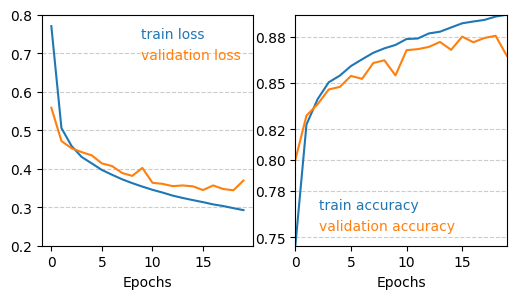

In [114]:
plot_history(history_train, fig_size=(6,3))

*Step 6: [Evaluate Model](https://keras.io/api/models/model_training_apis/)*


In [115]:
history_test = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8598


Step 7: Predict Model

In [116]:
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")


1/1 [==============================] - 0s 125ms/step

 pred.shape: (4, 28, 28)

 pred_x_test: [[0.    0.    0.    0.    0.    0.051 0.    0.088 0.003 0.857]
 [0.    0.    0.983 0.    0.002 0.    0.015 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]

 labels_pred: [9 2 1 1], y_test: [9 2 1 1]


**[Vanishing/exploding gradients](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
- Initialization
  - [Article](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
- Nonsaturating activation functions
- Batch normalization
- Gradient clipping

**[Time](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**

**[Limited data](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
 - [Transfer learning & fine-tuning](https://keras.io/guides/transfer_learning/)

In [145]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100, activation="relu"),
                                keras.layers.Dense(units=75, activation="relu"),
                                keras.layers.Dense(units=50, activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
print(f"\nweights:", len(model.weights))
print(f"trainable_weights:", len(model.trainable_weights))
print(f"non_trainable_weights:", len(model.non_trainable_weights))
print(f"\n shape: {model.get_weights()[0].shape}; initial_weights_values: {model.get_weights()[0]}")  # Keep a copy of the weights of layer1 for later reference
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ========================================================== Save model ==============================================================
model.save("model_old.h5")
# ========================================================== Load model ==============================================================
model_old = keras.models.load_model("model_old.h5")
print(f"\n shape_model_old: {model_old.get_weights()[0].shape}; initial_weights_values_model_old: {model_old.get_weights()[0]}")  # Keep a copy of the weights of layer1 for later 
# ========================================================= Clone old model ==========================================================
model_old_cloned = keras.models.clone_model(model_old)
model_old_cloned.set_weights(model_old.get_weights())
# ======================================================= Build the new model ========================================================
model_new = keras.models.Sequential(model_old.layers[:-1])   # Build a new model by taking the model_old and excluding the final layer
model_new.add(keras.layers.Dense(1, activation="sigmoid"))   # sigmoid for predict a class
# ========================================================= Freeze layers ============================================================
for layer in model_old.layers[:-1]:                          # Freeze all layers except the final layer
   layer.trainable = False
   print(layer.trainable)
# ===================================================== Compile the new model ========================================================
model_new.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
# ======================================================= Fit the new model ==========================================================
y_train_new = np.where(y_train==3, 1, 0)[:5000]
x_train_new = x_train[:5000, : , :]
history_train_ne = model_new.fit(x_train_new, y_train_new, epochs=5, validation_split=0.15)
# ======================================================== Compare weights ===========================================================
print(f"\n {model.get_weights()[0] = }") 
print(f"\n {model_old_cloned.get_weights()[0] = }") 
print(f"\n {model_new.get_weights()[0] = }") 

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_147 (Dense)           (None, 100)               78500     
                                                                 
 dense_148 (Dense)           (None, 75)                7575      
                                                                 
 dense_149 (Dense)           (None, 50)                3800      
                                                                 
 dense_150 (Dense)           (None, 10)                510       
                                                                 
Total params: 90385 (353.07 KB)
Trainable params: 90385 (353.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

weights: 8
tra

In [144]:
# ======================================================= Fit the new model ==========================================================
y_train_new = np.where(y_train==3, 1, 0)[:5000]
x_train_new = x_train[:5000, : , :]
history_train_ne = model_new.fit(x_train_new, y_train_new, epochs=5, validation_split=0.15)
# ======================================================== Compare weights ===========================================================
print(f"\n {model.get_weights()[0] = }") 
print(f"\n {model_old_cloned.get_weights()[0] = }") 
print(f"\n {model_new.get_weights()[0] = }") 

Epoch 1/5
133/133 [==============================] - 2s 5ms/step - loss: 0.3190 - accuracy: 0.8638 - val_loss: 0.1722 - val_accuracy: 0.9227
Epoch 2/5
133/133 [==============================] - 0s 4ms/step - loss: 0.1710 - accuracy: 0.9315 - val_loss: 0.1204 - val_accuracy: 0.9533
Epoch 3/5
133/133 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9565 - val_loss: 0.0977 - val_accuracy: 0.9773
Epoch 4/5
133/133 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9645 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 5/5
133/133 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.9652 - val_loss: 0.0763 - val_accuracy: 0.9827

 model.get_weights()[0] = array([[ 0.07143722, -0.03667773, -0.05903512, ..., -0.02320734,
         0.02847845, -0.05659326],
       [-0.07875159,  0.07233305,  0.07482135, ...,  0.06770159,
        -0.05408904,  0.03867002],
       [ 0.0191161 , -0.06801818,  0.04060438, ...,  0.07162975,
   

**[Overfitting](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
- `L1 and L2 regularization` 
  - `kernel_regularizer:` Regularizer to apply a penalty on the layer's kernel
  - `bias_regularizer:` Regularizer to apply a penalty on the layer's bias
  - `activity_regularizer:` Regularizer to apply a penalty on the layer's output
  - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)
  - [link 2](https://keras.io/api/layers/regularizers/)
- `Dropout` 
   - [Article 1](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
   - [Article 2](https://proceedings.mlr.press/v48/gal16.pdf)
   - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
   - [AlphaDropout:](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AlphaDropout) It fits well to Scaled Exponential Linear Units by randomly setting activations to the negative saturation value.
- `Max-Norm`
   - [link](https://keras.io/api/layers/constraints/#:~:text=MaxNorm%20class&text=Constrains%20the%20weights%20incident%20to,constraints.)

*L1 and L2 regularization*

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 dense_28 (Dense)            (None, 75)                7575      
                                                                 
 dense_29 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 weights:[[-0.05454794  0.07200268  0.07872881 ... -0.025913    0.05065185
   0.07531372]
 [-0.02115329  0.06905244 -0.01603611 ... -0.00016645  0.

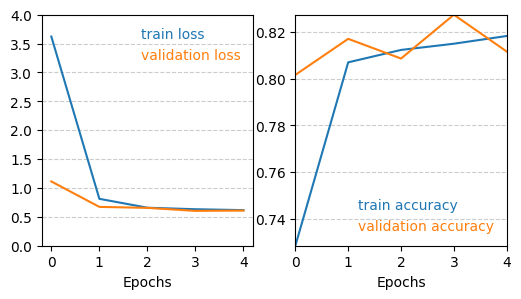

In [71]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100,
                                                   # kernel_regularizer=keras.regularizers.L1(0.3),   # L1 Regularization Penalty
                                                   kernel_regularizer=keras.regularizers.L2(0.05),    # L2 Regularization Penalty
                                                   # kernel_regularizer=keras.regularizers.L1L2(l1=0.01, l2=0.01),  # L1 + L2 penalties
                                                   # kernel_initializer="he_normal"
                                                   activation="relu"),
                                keras.layers.Dense(units=75, 
                                                   # kernel_regularizer=keras.regularizers.l2(0.01),
                                                   activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))

*Dropout*

In [85]:
# ====================================================== MonteCarlo Dropout ==========================================================
class MonteCarloDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 75)                7575      
                                                                 
 dropout_4 (Dropout)         (None, 75)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



 weights:[[ 0.02996031 -0.03540742  0.00823422 ...  0.01816821 -0.01698288
   0.04945466]
 [-0.021214    0.02525993  0.06814943 ...  0.06074598 -0.08095928
  -0.0213534 ]
 [ 0.00247108 -0.03606172  0.03108417 ...  0.0577945  -0.06794325
   0.05592054]
 ...
 [-0.00693009  0.07250816  0.06352565 ...  0.06454514 -0.0478492
  -0.04937061]
 [-0.04609954  0.01160078 -0.01148417 ... -0.03252644 -0.07695969
  -0.04983578]
 [ 0.00438149 -0.02482751  0.05858587 ...  0.00726666  0.04442345
  -0.07819727]]; 
 weights.shape: (784, 100)

 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; 
 bias.shape: (100,)
Epoch 1/5
1594/1594 [==============================] - 8s 5ms/step - loss: 0.8914 - accuracy: 0.6954 - val_loss: 0.5744 - val_accuracy

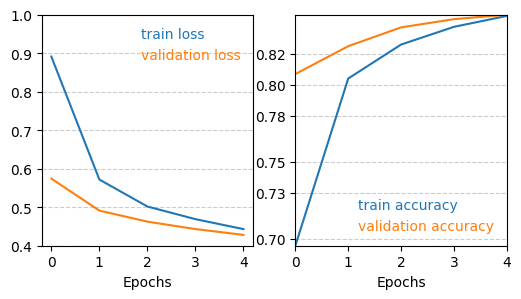

In [70]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
                                # keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=100, activation="relu"),
                                # keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=75, activation="relu"),
                                keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ============================================== Predict the model using dropout =====================================================
model_dropout = np.stack([model(x_test, training=True) for _ in range(60)])
model_dropout = np.round(np.mean(model_dropout, axis=0)[0:4], 3)
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))


*Max-Norm*

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dense_31 (Dense)            (None, 75)                7575      
                                                                 
 dense_32 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 weights:[[-0.02380341  0.00649553  0.01892323 ... -0.04895816  0.03811859
   0.02508196]
 [ 0.03059133  0.02663736  0.03797524 ...  0.01964966 -0

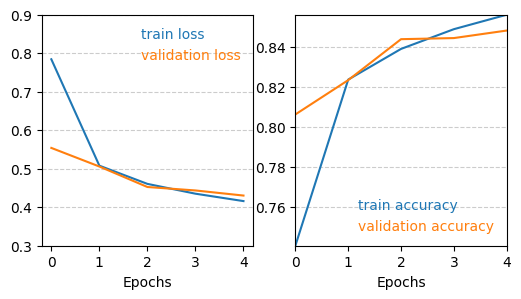

In [86]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100,
                                                   kernel_constraint=keras.constraints.max_norm(1.0),
                                                   activation="relu"),
                                keras.layers.Dense(units=75, 
                                                   activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))